## Midterm 2 - MNIST Classification
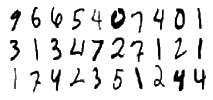
### Preparing environment and dataset:
* pip install python-mnist
* create folder midterm/data
* download from https://drive.google.com/open?id=1AQwyy3xP7rjDWMPkWBW4kKOfpkIyAWt8 - 4 files
* extract all files to ./data

#### The error of your classifier on test dataset must be better then 12.0% LeCun et al. 1998
#### Enter your error at https://goo.gl/forms/JRDKcotcXf5LZM3I3
#### Commit your code to github/bitbucket into folder midterm


In [1]:
from mnist import MNIST
import random
mndata = MNIST('.\\data')

trimages, trlabels = mndata.load_training()
teimages, telabels = mndata.load_testing()
index = random.randrange(0, len(trimages))  # choose an index ;-)
print('The amount of train images',len(trimages))
print('The amount of test images',len(trimages))
print('The label of random image',trlabels[index],'The random image is',mndata.display(trimages[index]))
print('Images are binary with 28*28 = ',len(trimages[index]))

The amount of train images 60000
The amount of test images 60000
The label of random image 8 The random image is 
............................
............................
............................
............................
............................
...............@@@@@@.......
.............@@@@@@@@@......
.............@@@@@@@@@@.....
.............@@@@@.@@@@.....
............@@@@@..@@@@.....
............@@@@@.@@@@......
..........@@@@@@@@@@@@......
..........@@@@@@@@@@@.......
.........@@@@@@@@@@@........
.........@@@@@@@@@@.........
........@@@@@@@@@@@@........
........@@@@@@@@@@@@........
.......@@@@@@....@@@........
.......@@@@.....@@@@........
.......@@@.....@@@@@........
.......@@@....@@@@@.........
.......@@@@@@@@@@@..........
.......@@@@@@@@@@...........
.......@@@@@@@..............
.........@@@@...............
............................
............................
............................
Images are binary with 28*28 =  784


In [12]:

import numpy as np


# Each image is an array of 784 (28x28) float values  from 0 (white) to 1 (black).

def load_data(one_hot=True, reshape=None, validation_size=10000):

    x_tr = load_images('./data/train-images-idx3-ubyte')

    y_tr = load_labels('./data/train-labels-idx1-ubyte')

    x_te = load_images('./data/t10k-images-idx3-ubyte')

    y_te = load_labels('./data/t10k-labels-idx1-ubyte')



    x_tr = x_tr[:-validation_size]

    y_tr = y_tr[:-validation_size]



    if one_hot:

        y_tr, y_te = [to_one_hot(y) for y in (y_tr, y_te)]



    if reshape:

        x_tr, x_te = [x.reshape(*reshape) for x in (x_tr, x_te)]



    return x_tr, y_tr, x_te, y_te



def load_images(filename):

  

    with open(filename, 'rb') as f:

        data = np.frombuffer(f.read(), np.uint8, offset=16)

    return data.reshape(-1, 28 * 28) / np.float32(256)



def load_labels(filename):

    

    with open(filename, 'rb') as f:

        data = np.frombuffer(f.read(), np.uint8, offset=8)

    return data


# Convert class labels from scalars to one-hot vectors.

def to_one_hot(labels, num_classes=10):

    return np.eye(num_classes)[labels]

In [13]:
import mnist

from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten,Conv2D


from keras.layers.core import Dense, Activation, Flatten

from keras.layers.convolutional import Convolution2D, MaxPooling2D

from keras.optimizers import SGD



trX, trY, teX, teY = load_data(one_hot=True, reshape=(-1, 1, 28, 28))



model = Sequential()

model.add(Conv2D(8, (5, 5), activation="sigmoid", input_shape=trX.shape[1:], data_format='channels_first'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(100, activation='sigmoid'))

model.add(Dense(10, activation='softmax'))



num_epochs, batch_size, learn_rate = 5, 10, 0.2



model.compile(SGD(learn_rate), 'categorical_crossentropy', metrics=['accuracy'])

model.fit(trX, trY, batch_size, num_epochs, verbose=1, validation_data=(teX, teY))

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 45s 893us/step - loss: 0.4271 - acc: 0.8593 - val_loss: 0.1361 - val_acc: 0.9572
Epoch 2/5
50000/50000 [==============================] - 44s 883us/step - loss: 0.1160 - acc: 0.9650 - val_loss: 0.0840 - val_acc: 0.9755
Epoch 3/5
50000/50000 [==============================] - 109s 2ms/step - loss: 0.0772 - acc: 0.9767 - val_loss: 0.0681 - val_acc: 0.9781
Epoch 4/5
50000/50000 [==============================] - 51s 1ms/step - loss: 0.0587 - acc: 0.9818 - val_loss: 0.0758 - val_acc: 0.9747
Epoch 5/5
50000/50000 [==============================] - 54s 1ms/step - loss: 0.0475 - acc: 0.9855 - val_loss: 0.0614 - val_acc: 0.9798
